In [ ]:
################# benign database ######################

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


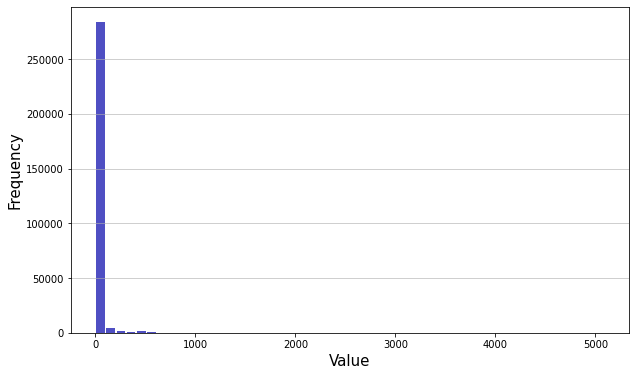

In [55]:
# Frequent COG terms

cog_freq = pd.read_csv("databases/benign/common_STRING/STRING_COG_frequencies", header=None, sep=r"\s+")
cog_freq.head()

plt.figure(figsize=[10,6])
# n, bins, patches = plt.hist(x=cog_freq[0], bins=50, color='#0504aa',alpha=0.7, rwidth=0.85, range=(0, 1000))
n, bins, patches = plt.hist(x=cog_freq[0], bins=50, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

common_genes = cog_freq[1][cog_freq[0]>1000]
common_genes.to_csv('databases/benign/common_genes.models', header=None, index=False)
# print(len(common_genes))

# for i in common_genes:
#     os.system("cat databases/benign/2/" + i + ".hmm.gz >> databases/benign/common_STRING.hmm")    
#     os.system("grep " + i + " databases/benign/2_annotations.tsv >> databases/benign/common_STRING_annotations.tsv")

In [ ]:
# BiGG E. coli core genome model

import json
import urllib.request  as urllib2 
url = "http://bigg.ucsd.edu/api/v2/models/e_coli_core/genes/"
response = urllib2.urlopen(url)
data = response.read()
values = json.loads(data)

file = open('/Users/wheelern/Dropbox/NTI/binf/databases/benign/BiGG_e_coli_core_prot.fasta', "w")
for i in values['results']:
    gene = json.loads(urllib2.urlopen("http://bigg.ucsd.edu/api/v2/models/e_coli_core/genes/" + i['bigg_id']).read())
    # could fetch a Uniprot description here
    if not gene['protein_sequence'] == None:
#     print(gene['name'], gene['protein_sequence'], gene['reactions'][0]['name'])
        file.write(">" + gene['name'] + " " + gene['reactions'][0]['name'] + "\n" + gene['protein_sequence'] + "\n")
#     print(gene)
#     file.write(">" + gene['name'] + "\n" + gene['protein_sequence'] + "\n")
file.close()

In [54]:
# filtering BiGG hits

search = pd.read_csv('databases/benign/BiGG_EggNOG.parse', sep="\t", header=None)
print(search.shape)
search = search.drop_duplicates(subset=0)
print(search.shape)

# print(search.head())
# print(search.columns)

models = search[3]
models = models.str.replace('.faa.final_tree.fa', '')
models = models.str.replace('.faa.final_tree', '')

models.to_csv('databases/benign/BiGG_EggNOG.models', header=None, index=False)


(4731, 23)
(136, 23)


<ipython-input-54-d7e7459f136d>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  models = models.str.replace('.faa.final_tree.fa', '')
<ipython-input-54-d7e7459f136d>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  models = models.str.replace('.faa.final_tree', '')
